In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

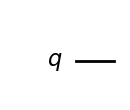

In [10]:
qc1 = QuantumCircuit(1)
qc1.draw("mpl")

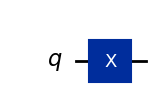

In [11]:
qc2 = QuantumCircuit(1)
qc2.x(0)
qc2.draw("mpl")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


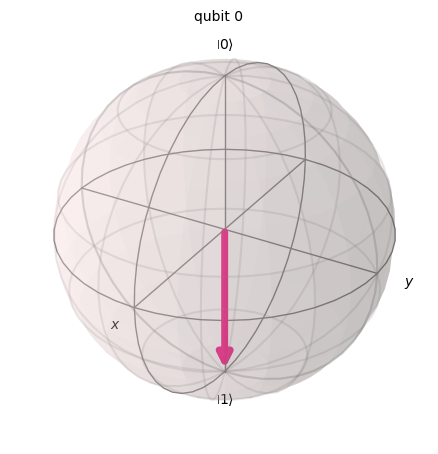

In [12]:
out_vector = Statevector(qc2)
print(out_vector)
plot_bloch_multivector(out_vector)

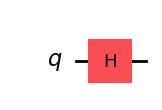

In [13]:
qc3 = QuantumCircuit(1)
qc3.h(0)
qc3.draw(output="mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


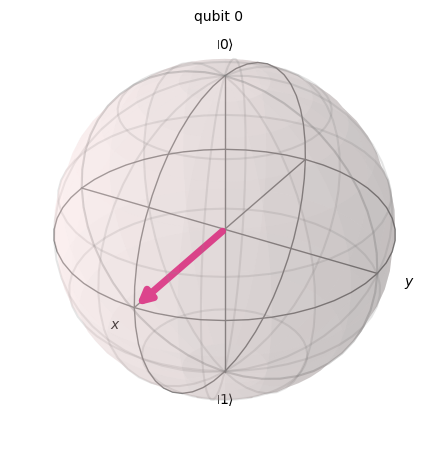

In [14]:
out_vector = Statevector(qc3)
print(out_vector)
plot_bloch_multivector(out_vector)

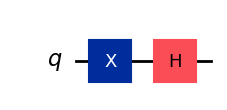

In [15]:
qc4 = QuantumCircuit(1)
qc4.x(0)
qc4.h(0)
qc4.draw(output="mpl")

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


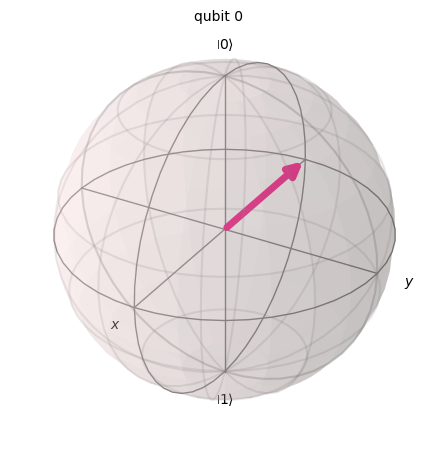

In [16]:
out_vector = Statevector(qc4)
print(out_vector)
plot_bloch_multivector(out_vector)

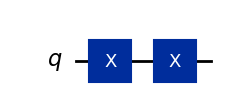

In [17]:
#Exercise 1:

#(1) XX|0>
qc5 = QuantumCircuit(1)  

qc5.x(0)  
qc5.x(0)  

qc5.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


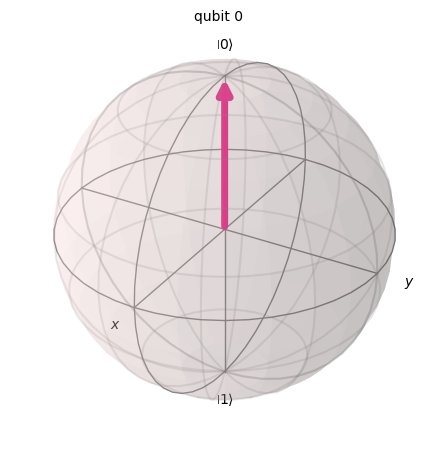

In [18]:
out_vector = Statevector(qc5)
print(out_vector)

plot_bloch_multivector(out_vector)

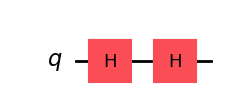

In [19]:
#(2) HH|0>
qc6 = QuantumCircuit(1)

qc6.h(0)
qc6.h(0)

qc6.draw(output="mpl")

Statevector([ 1.00000000e+00+0.j, -2.23711432e-17+0.j],
            dims=(2,))


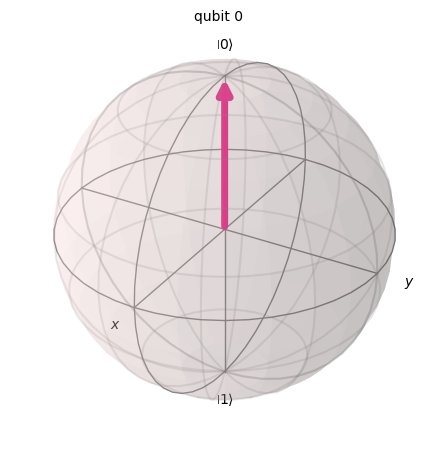

In [20]:
out_vector = Statevector(qc6)
print(out_vector)

plot_bloch_multivector(out_vector)

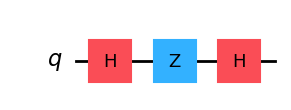

In [21]:
#(2) HZH|0>
qc7 = QuantumCircuit(1)

qc7.h(0)
qc7.z(0)
qc7.h(0)

qc7.draw(output="mpl")

Statevector([-2.23711432e-17+0.j,  1.00000000e+00+0.j],
            dims=(2,))


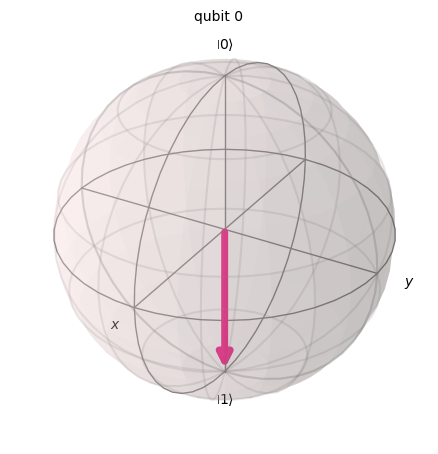

In [22]:
out_vector = Statevector(qc7)
print(out_vector)

plot_bloch_multivector(out_vector)

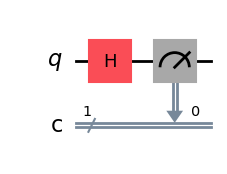

In [23]:
qc8 = QuantumCircuit(1, 1)
qc8.h(0)
qc8.measure(0, 0)
 
qc8.draw(output="mpl")

{'0': 512, '1': 512}


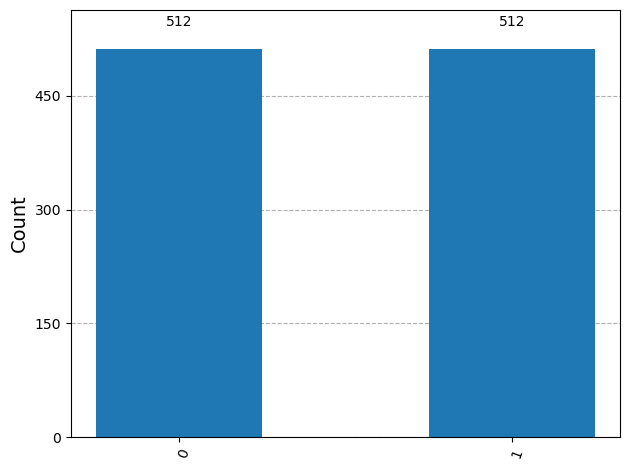

In [24]:
#Explain all of this please
backend = AerSimulator()
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc8 = pm.run(qc8)
 
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc8])
result = job.result()
 
counts = result[0].data.c.get_counts()
print(counts)
 
plot_histogram(counts)

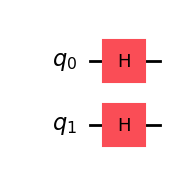

In [25]:
qc9 = QuantumCircuit(2)
 
qc9.h(0)
 
qc9.h(1)
 
qc9.draw(output="mpl")

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


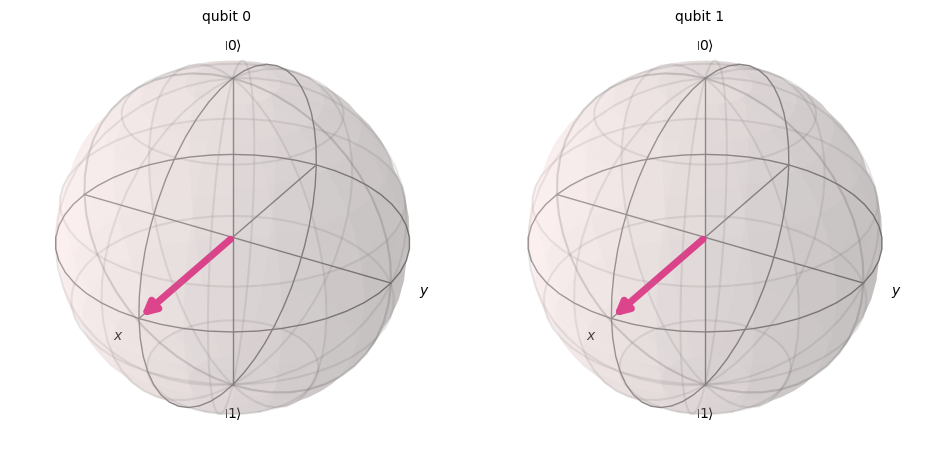

In [26]:
out_vector = Statevector(qc9)
print(out_vector)

plot_bloch_multivector(out_vector)

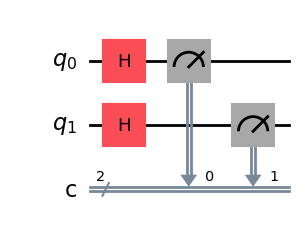

In [27]:
qc10 = QuantumCircuit(2, 2)
 
qc10.h(0)
qc10.h(1)
 
qc10.measure(0, 0)  # Measure qubit 0 and save the result in bit 0
qc10.measure(1, 1)  # Measure qubit 1 and save the result in bit 1
 
qc10.draw(output="mpl")

{'10': 278, '01': 255, '00': 258, '11': 233}


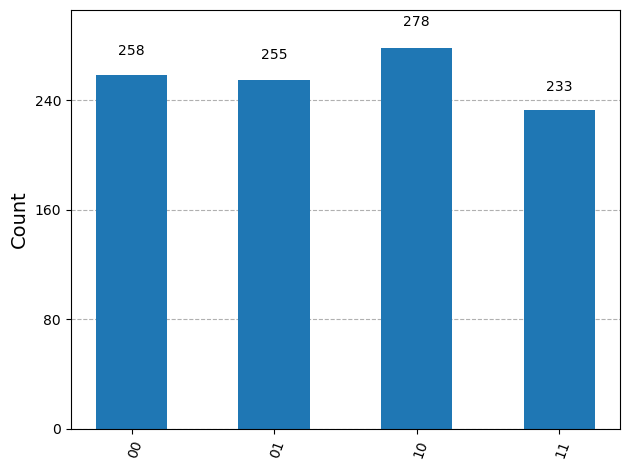

In [28]:
backend = AerSimulator()
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc10 = pm.run(qc10)
 
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc10])
result = job.result()
 
counts = result[0].data.c.get_counts()
print(counts)
 
plot_histogram(counts)